In [1]:
cd D:\Downloads

D:\Downloads


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(pd.read_csv("Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
categories = df.Species.unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
x_train = data[:, 1:5]
y_train = data[:, 5]

In [6]:
import seaborn

C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


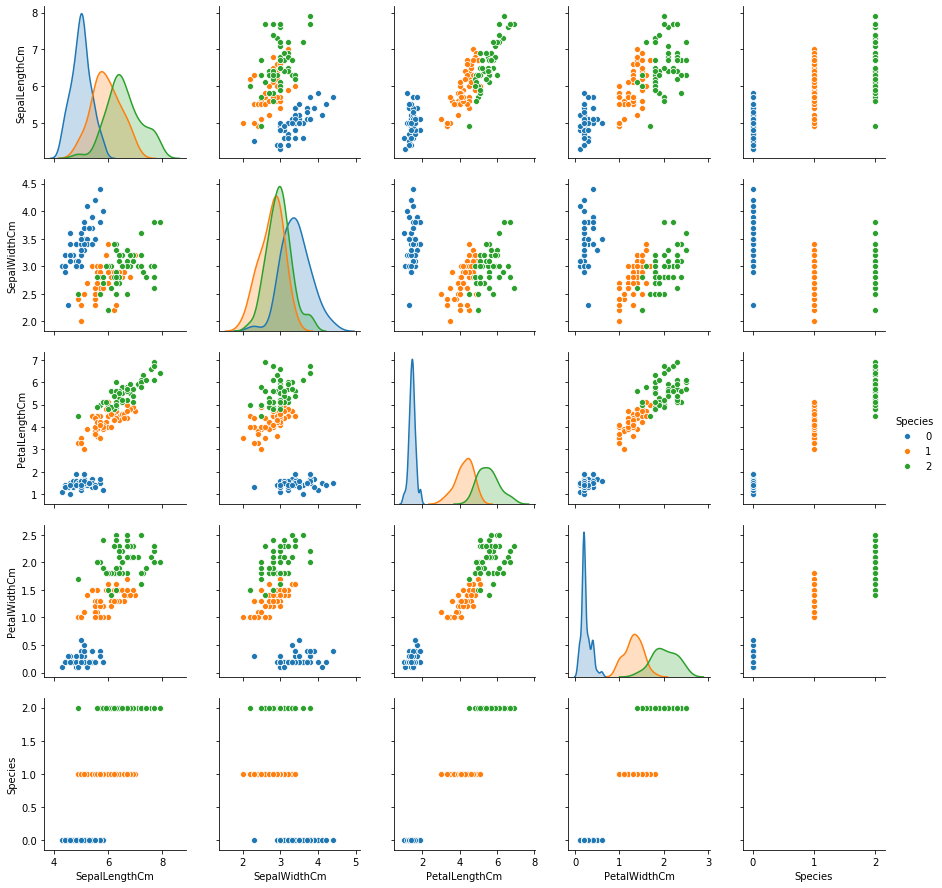

In [7]:
seaborn.pairplot(df.iloc[:,1:6], hue='Species')

Least overlapping points are when petal length and petal width is plotted

Sepal length and petal width plot also has less overlapping points

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
'''def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) #Cross Entropy Loss Function
    grad = 1 / m * ((y - h) @ x)
    return cost, grad'''

In [9]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum((y-h)**2) #Mean Square error
    grad = 1 / m * ((y - h) *h *(1-h))@x
    return cost, grad

In [10]:
def fit(x, y, max_iter=1000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

In [11]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

Text(0, 0.5, 'Petal Width (cm)')

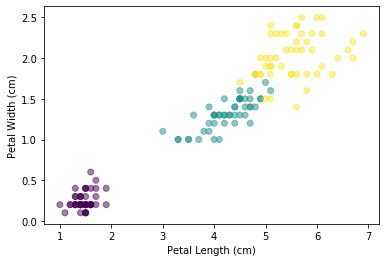

In [12]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

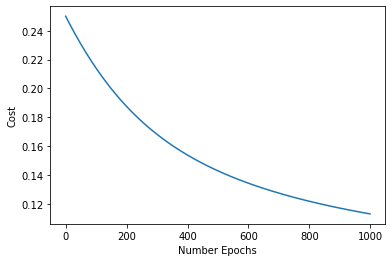

In [13]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


In [14]:
thetas

[array([ 2.01385448, -0.60031037, -0.92992492]),
 array([-0.94943585,  0.16197336, -0.19819362]),
 array([-2.11871845,  0.03053302,  1.24202992])]

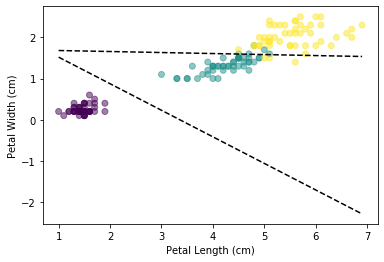

In [17]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
i = 0
for theta in [thetas[0], thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [18]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [19]:
np.array(y_pred), y_train

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
        2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 0, 11, 39],
       [ 0,  0, 50]], dtype=int64)

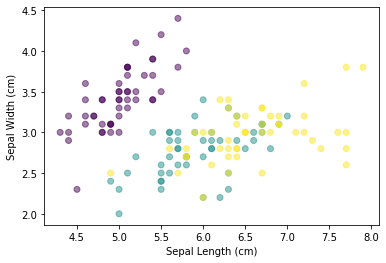

In [20]:
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, alpha=0.5)
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Sepal Width (cm)");

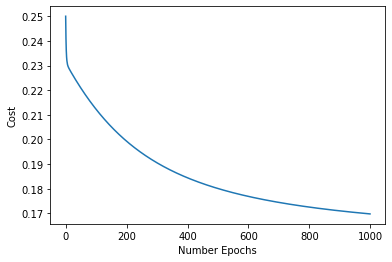

In [21]:
thetas, classes, costs = fit(x_train[:, :2], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


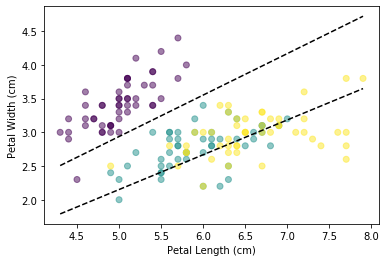

In [27]:
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in [thetas[0], thetas[2]]:
    j = np.array([x_train[:, 0].min(), x_train[:, 0].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

Here the points are overlapping making it difficult to classify perfectly. So we have to choose other feature pairs for perfect classification

In [24]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[ 0, 50,  0],
       [ 0,  4, 46],
       [ 0,  0, 50]], dtype=int64)

##### Using the whole 5 features

In [29]:
thetas, classes, costs = fit(x_train, y_train)

In [30]:
y_pred=predict(classes, thetas, x_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 0, 40, 10],
       [ 0,  0, 50]], dtype=int64)

When the features are increased we can see that the model predicts more accurately from the confusion matrix